In [1]:
#import depndencies

#import requests
#from pprint import pprint
#import calendar as cd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime as dt

In [2]:
#url = "https://data.austintexas.gov/api/views/3t4q-mqs5/rows.json?"
#crime_response = requests.get(url)
#crime_json = crime_response.json()
#crime_json["meta"]["view"]
#crime_json

In [3]:
crimedata_2017 = pd.read_csv("2017_Annual_Crime.csv")

In [4]:
cleaned_crimedata_2017_df = crimedata_2017[["Council District", "Highest NIBRS/UCR Offense Description", 
                              "GO Report Date","GO Location Zip"]]

In [5]:
cleaned_crimedata_2017_df.count()

Council District                         34844
Highest NIBRS/UCR Offense Description    35097
GO Report Date                           35097
GO Location Zip                          34982
dtype: int64

In [6]:
cleaned_crimedata_2017_df = cleaned_crimedata_2017_df.dropna(how='any')

cleaned_crimedata_2017_df.count()

Council District                         34844
Highest NIBRS/UCR Offense Description    34844
GO Report Date                           34844
GO Location Zip                          34844
dtype: int64

In [7]:
cleaned_crimedata_2017_df.head()

,Council District,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location Zip
0,1.0,Auto Theft,3-Feb-17,78724.0
1,9.0,Agg Assault,25-Feb-17,78701.0
2,7.0,Theft,12-Feb-17,78753.0
3,4.0,Theft,22-Feb-17,78753.0
4,2.0,Theft,8-Mar-17,78744.0


In [8]:
cleaned_crimedata_2017_df = cleaned_crimedata_2017_df.rename(columns={"Council District" : "District", 
                                   "Highest NIBRS/UCR Offense Description":"Offense",
                                   "GO Report Date": "Report Date",
                                   "GO Location Zip":"Zip Code"})

cleaned_crimedata_2017_df.head()

,District,Offense,Report Date,Zip Code
0,1.0,Auto Theft,3-Feb-17,78724.0
1,9.0,Agg Assault,25-Feb-17,78701.0
2,7.0,Theft,12-Feb-17,78753.0
3,4.0,Theft,22-Feb-17,78753.0
4,2.0,Theft,8-Mar-17,78744.0


In [9]:
cleaned_crimedata_2017_df["report date - converted"] = pd.to_datetime(cleaned_crimedata_2017_df["Report Date"])
cleaned_crimedata_2017_df.head()

cleaned_crimedata_2017_df["Month Number"] = cleaned_crimedata_2017_df["report date - converted"].dt.month
cleaned_crimedata_2017_df.head()
#strftime()
#cleaned_crimedata_2017_df["Year"] = cleaned_crimedata_2017_df["report date - converted"].dt.year
#cleaned_crimedata_2017_df.head()

#cleaned_crimedata_2017_df["Month Name"] = cd.month_name[cleaned_crimedata_2017_df["Month Number"]]
#(calendar.month_name[month_idx])

cleaned_crimedata_2017_df["Week #"] = cleaned_crimedata_2017_df["report date - converted"].dt.week
cleaned_crimedata_2017_df.head()


,District,Offense,Report Date,Zip Code,report date - converted,Month Number,Week #
0,1.0,Auto Theft,3-Feb-17,78724.0,2017-02-03,2,5
1,9.0,Agg Assault,25-Feb-17,78701.0,2017-02-25,2,8
2,7.0,Theft,12-Feb-17,78753.0,2017-02-12,2,6
3,4.0,Theft,22-Feb-17,78753.0,2017-02-22,2,8
4,2.0,Theft,8-Mar-17,78744.0,2017-03-08,3,10


In [10]:
cleaned_crimedata_2017_df["Offense"].value_counts()

#cleaned_crimedata_2017_df = cleaned_crimedata_2017_df.replace({})

Theft          24455
Burglary        4311
Agg Assault     2304
Auto Theft      2000
Robbery          976
Rape             773
Murder            25
Name: Offense, dtype: int64

In [11]:
cleaned_crimedata_2017_df = cleaned_crimedata_2017_df.replace({"Auto Theft":"Theft"})

cleaned_crimedata_2017_df["Offense"].value_counts()

Theft          26455
Burglary        4311
Agg Assault     2304
Robbery          976
Rape             773
Murder            25
Name: Offense, dtype: int64

In [24]:
group_crimedata_2017 = cleaned_crimedata_2017_df.groupby(("Week #", "Offense"))#, "Year"))

#group_crimedata_2017_df is abbreviated gcd_2017_df
gcd_2017_df = group_crime_2017.count()

gcd_2017_df = gcd_2017_df.reset_index().rename(columns={'District':'Count'})
gcd_2017_df = gcd_2017_df[['Week #','Offense','Count']]

gcd_2017_df.head()



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


,Week #,Offense,Count
0,1,Agg Assault,32
1,1,Burglary,76
2,1,Rape,13
3,1,Robbery,17
4,1,Theft,507


In [13]:
#Useful Report information for the different years

#theft records
theft_info_2017 = gcd_2017_df.loc[gcd_2017_df['Offense']=='Theft']
max_theft_2017 = theft_info_2017['Count'].max()
min_theft_2017 = theft_info_2017['Count'].min()
max_theft_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==max_theft_2017]
min_theft_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==min_theft_2017]

#max_theft_2017
max_theft_week_2017; 
min_theft_week_2017

#max_theft = gcd_2017_df.loc[gcd_2017_df['Count']==(gcd_2017_df.loc[gcd_2017_df['Offense']=='Theft'].max())] 
#week_dat['Count']
#week_dat
#week_dat1
#gcd_2017_df.head()


#gcd_2017_df.loc[gcd_2017_df['Offense']=='Theft'].max(gcd_2017_df['Count'])

,Week #,Offense,Count
184,34,Theft,420


In [14]:
#Agg Assault records
agg_info_2017 = gcd_2017_df.loc[gcd_2017_df['Offense']=='Agg Assault']
max_agg_num_2017 = agg_info_2017['Count'].max()
min_agg_num_2017 = agg_info_2017['Count'].min()
max_agg_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==max_agg_num_2017]
min_agg_week_2017 = gcd_2017_df.loc[gcd_2017_df['Count']==min_agg_num_2017]

#max agg_assault record
max_agg_num_2017
max_agg_week_2017
#min agg_assault record
min_agg_num_2017
min_agg_week_2017

,Week #,Offense,Count
271,51,Agg Assault,27


<BarContainer object of 282 artists>

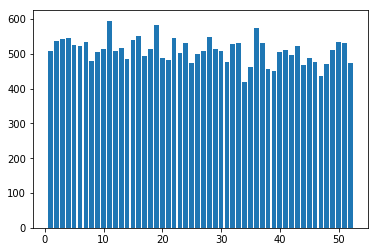

In [16]:
plt.bar(gcd_2017_df['Week #'], gcd_2017_df['Count'], label=gcd_2017_df['Offense'])

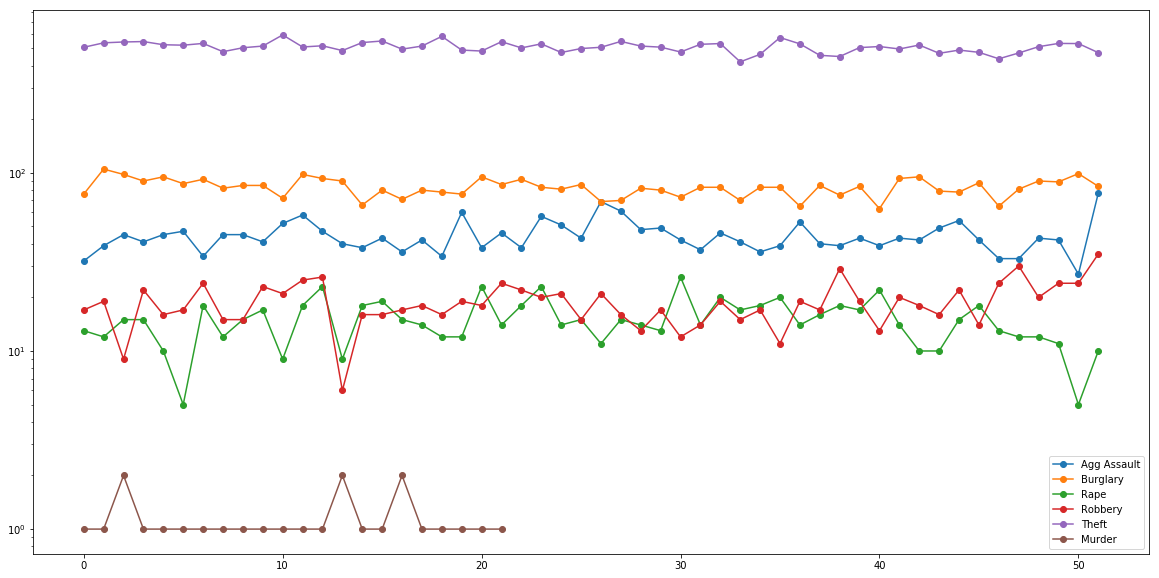

In [17]:
gcd_2017_df

plt.figure(figsize=[20, 10])
x_axis = np.arange(364)
for offense in gcd_2017_df['Offense'].unique():
    plt.plot(np.arange(len(gcd_2017_df[gcd_2017_df['Offense'] == offense]['Count'])), gcd_2017_df[gcd_2017_df['Offense'] == offense]['Count'], marker='o', label=offense)
    #x_axis = x_axis + 0.1
#plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yscale('log')
plt.legend()

In [18]:

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#plt.plot(months, gcd_2017_df.iloc[4:9]#,"District"])

#plt.show()

#group_crime_2017["Offense"].count().plot.line()

In [19]:
#gcd_2017_df[gcd_2017_df['Offense'] == 'Robbery']['Count']

3      17
8      19
14      9
19     22
25     16
30     17
35     24
40     15
45     15
51     23
57     21
62     25
68     26
74      6
79     16
84     16
89     17
95     18
100    16
106    19
111    18
116    24
122    22
127    20
133    21
138    15
144    21
149    16
154    13
160    17
166    12
171    14
177    19
183    15
189    17
194    11
200    19
205    17
210    29
216    19
221    13
226    20
232    18
237    16
242    22
247    14
253    24
258    30
263    20
269    24
274    24
280    35
Name: Count, dtype: int64